In [1]:
import ROOT #Start by importing ROOT
import numpy as np
# ROOT.enableJSVis() #need this to make interactive ROOT plots
import os
import time
c1 = ROOT.TCanvas() #declare the ROOT canvas
ROOT.gSystem.Load("/home/vasu/quadis/build/lib/libquadis.so")
# ROOT.gSystem.Load("/usr/local/software/quadis/build/lib/libquadis.so") 


Welcome to JupyROOT 6.22/02


0

Loaded library tree with 1724 entries
Best fit index: 1426 with chi-square: 1.16257 NDOF: 59 shifted: -14 start data sample: 994 and prob: 1


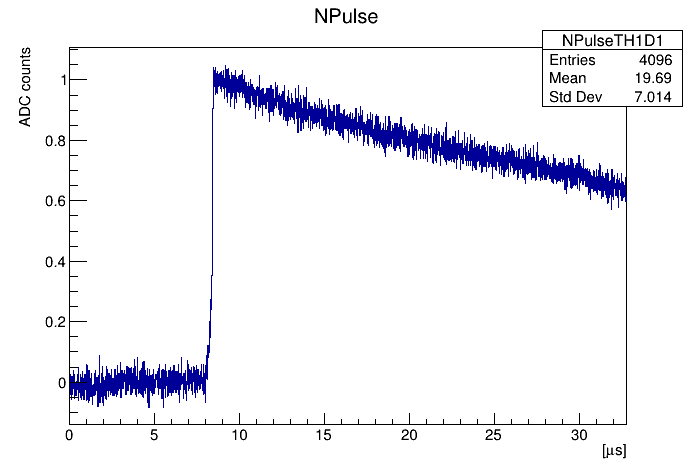

In [2]:
#Grab a pulse from the data
infile = ROOT.TFile("/home/vasu/PPC/PPC_SigGen/CleanNoisyPulses/parallel_output/60kev/data15_sim630to674.root")
# infile = ROOT.TFile("/home/vasu/PPC/PPC_SigGen/SCAN100004/SCAN100004_RUN13.root")
tree = infile.Get("T1")
nevent = ROOT.NEvent()
tree.SetBranchAddress("NEvent",nevent)
tree.GetEntry(9)
npulse = nevent.GetPulse(0) #the original pulse
# npulse = normalize(npulse)

#Initialize the fitter
fitter = ROOT.NAPulseFitter("/home/vasu/PPC/PPC_SigGen/SignalLib_root/new_OutputRZperfect.root","T1","NEvent",1)

# Parameters to pre-process pulse
baselines =1000
taus = 7100
rises=700
gaps=225
pulse = fitter.GetPreProcessedPulse(npulse, False, baselines, taus, rises, gaps)# true applies pole-zero
ph = npulse.GetTH1Dmus()
ph.Draw()
c1.Draw()

#Prepare the fitter
fitter.SetLibPulseMinThreshold(0.01)
fitter.SetLibPulseMaxThreshold(0.75)
# fitter.FixNDOF() #if true, maxthreshold ignored
# fitter.SetNDOF(100)
fitter.SetShiftWindow(5) #shift by +/- this much around point of alignment
#Do the fit:
fitter.FitPulse(pulse)
#Print the best fit
fitter.PrintBestFit()
#fitter.PrintFitResult(1466)

-14


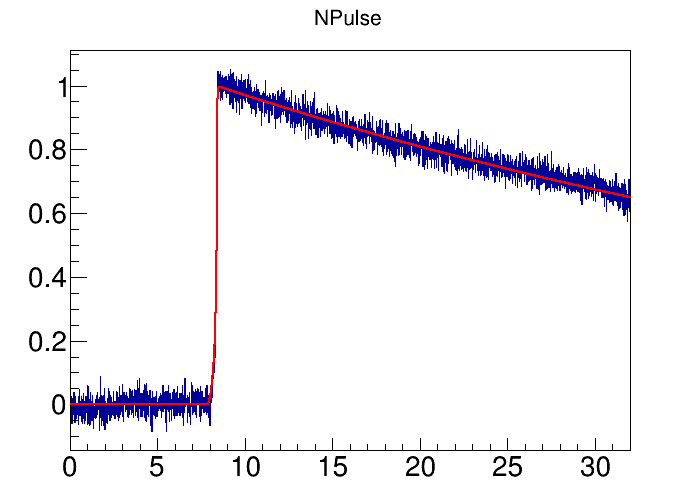

In [14]:
libpulse = fitter.GetBestFitPulse()
shift = fitter.GetBestShift()
ph = pulse.GetTH1Dmus()
ph.Draw()

lh = libpulse.GetTH1Dmus()
lh.SetLineColor(2)
lh.SetLineWidth(2)
lh.GetXaxis().SetLimits(8*shift/1000.,8*shift/1000.+lh.GetNbinsX()*8/1000.)
lh.Draw("same")
c1.Draw()
c1.SetWindowSize(1000,1000)
c1.SetCanvasSize(700,500)
ph.GetXaxis().SetRange(0,4000)
ph.GetXaxis().SetLabelSize(0.06)
ph.GetYaxis().SetLabelSize(0.06)
ph.GetXaxis().SetTitleSize(444)
ph.GetYaxis().SetTitleSize(444)
ph.SetStats(0)
# c1.SaveAs("images/fitter.png")

print (shift)

2.8187302345662704
0.9162441520049157


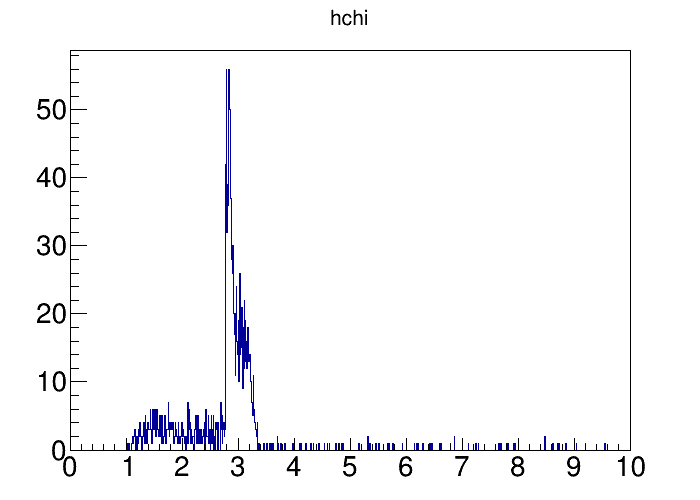

In [4]:
chis = fitter.GetChis()
hchi = ROOT.TH1D("hchi","hchi", 1000, 0., 10)

for chi in chis:
    hchi.Fill(chi)
hchi.Draw()
c1.Draw()
hchi.GetXaxis().SetLabelSize(0.06)
hchi.GetYaxis().SetLabelSize(0.06)
hchi.SetStats(0)
# hchi.GetXaxis().SetTitleSize(0.5)
# hchi.GetYaxis().SetTitleSize(0.5)
print (hchi.GetMean())
print (hchi.GetStdDev())

In [6]:
print (nevent.GetPulseData(0).GetParameterByName("R"))
print (nevent.GetPulseData(0).GetParameterByName("Z"))
print (fitter.GetLibPulseData(1426).GetParameterByName("R"))
print (fitter.GetLibPulseData(1426).GetParameterByName("Z"))

26.0
6.0
33.0
7.0
